In [4]:
#-----------------------------------------------------
# Implements Kramer-Kronig Transform
#----------------------------------------------------
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import cmath
import math
from scipy import signal
from scipy import integrate

plt.style.use('ggplot')
markers = ["o", "X", "P", "p", "*"]
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]
bbox = dict(boxstyle="round", fc="0.9")
one=complex(1.0,0.0)
ii=complex(0.0,1.0)
zero=complex(0.0,0.0)

In [31]:
#------------------------------------------------------
#CONVOLUTION FUNCTION
#------------------------------------------------------
#          infty
#y3(t)=int^      y1(tau)*y2(t-tau)
#         -infty

def convolve(y1,y2,ss):
  n=len(y1)
  y1p=np.pad(y1,(n,n),'constant',constant_values=(0,0))
  y2p=np.pad(y2,(n,n),'constant',constant_values=(0,0))
  y3p=signal.convolve(y1p,y2p,mode='same')
  y3=y3p[n:2*n]*ss
  return y3
#------------------------------------------------------
  

#------------------------------------------------------
#Kramers-Kronig transform
#------------------------------------------------------
def kkt(w,rho):
    ss = (max(w) - min(w))/(len(w) - 1)
    wl=w+np.ones(len(w))*ss/2.0
    owl=1.0/wl
    return(convolve(-rho/np.pi,owl,ss))
#------------------------------------------------------



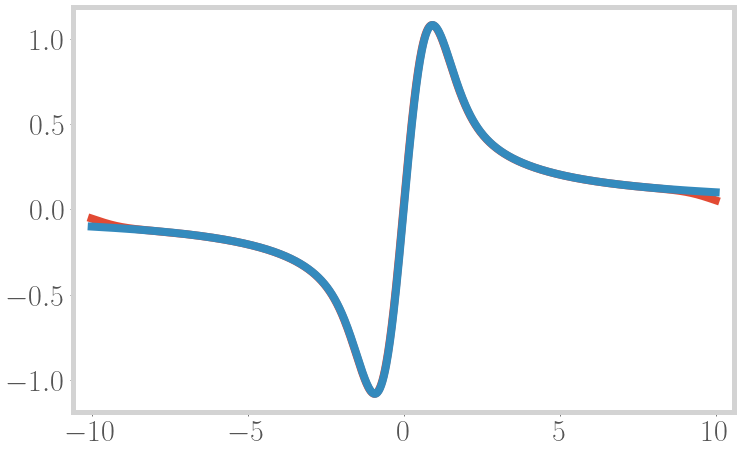

In [32]:
#------------------------------------------------------
def gauss(z,t):
  G=-ii*np.sqrt(np.pi)*special.wofz(z/t)/t
  return G
#------------------------------------------------------


def example1():
    t=1.0
    eta=1.0e-03

    #Frequency Grid
    w = np.linspace(-10, 10, 1001)

    gamma=w+ii*eta
    G=gauss(gamma,t)

    rho=G.imag
    ReG=kkt(w,rho)
    ReG_exact=G.real

    plt.plot(w,ReG)
    plt.plot(w,ReG_exact)
    plt.show()
    
example1()

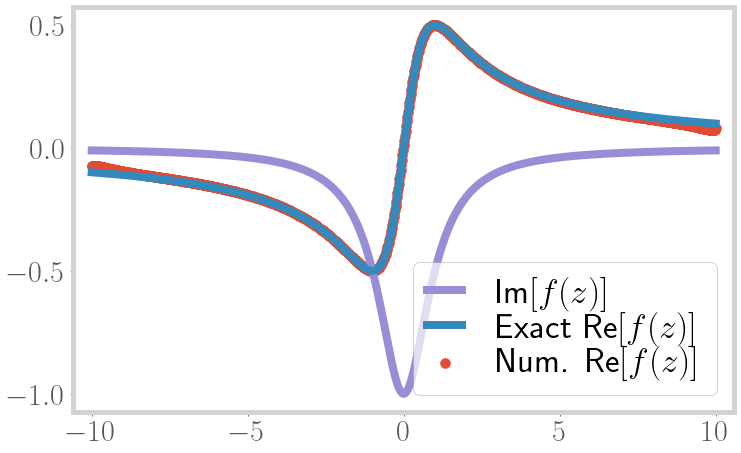

In [33]:
def example2():
    w_list = np.linspace(-10, 10, 1001)

    func = 1/(w_list + 1j)
    Im_func = func.imag
    
    Re_func = kkt(w_list, Im_func)
    Re_func_exact = func.real

    plt.plot(w_list,Im_func,color=cols[2], label=r"$\text{Im}[f(z)]$")
    plt.plot(w_list,Re_func_exact,color=cols[1], label=r"Exact $\text{Re}[f(z)]$")
    plt.scatter(w_list,Re_func,color=cols[0], label=r"Num. $\text{Re}[f(z)]$")
    plt.legend()
    plt.show()
    
example2()

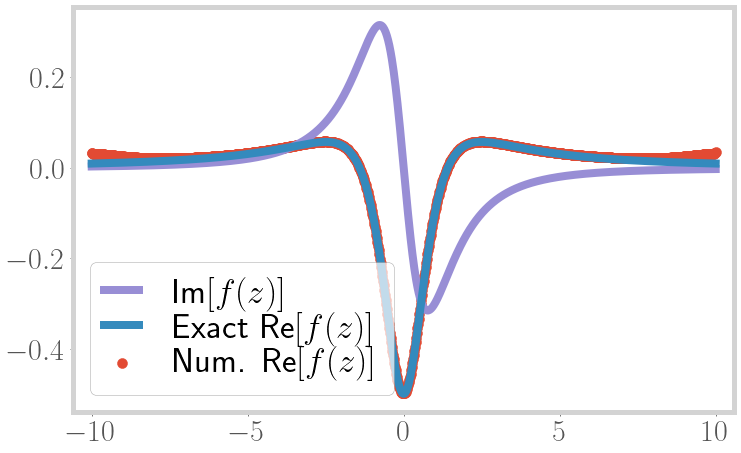

In [36]:
def example3():
    w_list = np.linspace(-10, 10, 1001)

    func = 1/((w_list + 1j) * (w_list + 2j))
    Im_func = func.imag

    Re_func = kkt(w_list, Im_func)
    Re_func_exact = func.real

    plt.plot(w_list,Im_func,color=cols[2], label=r"$\text{Im}[f(z)]$")
    plt.plot(w_list,Re_func_exact,color=cols[1], label=r"Exact $\text{Re}[f(z)]$")
    plt.scatter(w_list,Re_func,color=cols[0], label=r"Num. $\text{Re}[f(z)]$")
    plt.legend()
    plt.show()
    
example3()